# HR Analytics
## Problem Statement
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset

df = pd.read_csv('dataset_ass7.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
df.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [7]:
df.fillna(0,inplace =True)
df.isnull().any() # no null values

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [8]:
df.drop(['EmployeeCount','EmployeeID','StandardHours', 'Over18'],axis=1,inplace=True) # removing useless features
df.head() # unnecessary features removed

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


### Univariate Analysis

In [13]:
# get describe of Continuous variables only
df[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 
    'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0
Education,4410.0,2.912925,1.023933,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0
NumCompaniesWorked,4410.0,2.683220,2.499737,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,4410.0,11.256916,7.790928,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,4410.0,2.799320,1.288978,0.0,2.0,3.0,3.0,6.0
YearsAtCompany,4410.0,7.008163,6.125135,0.0,3.0,5.0,9.0,40.0
YearsSinceLastPromotion,4410.0,2.187755,3.221699,0.0,0.0,1.0,3.0,15.0


In [100]:
# get median of continuous variables
df[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
  'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [102]:
# Mode
df[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 
  'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mode().T

,0
Age,35.0
DistanceFromHome,2.0
Education,3.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0
YearsSinceLastPromotion,0.0


In [30]:
# Variance
df[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var()

Age                        8.341719e+01
DistanceFromHome           6.569144e+01
Education                  1.048438e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.248686e+00
PercentSalaryHike          1.338907e+01
TotalWorkingYears          6.069855e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
dtype: float64

In [32]:
# Skewness
df[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()

Age                        0.413005
DistanceFromHome           0.957466
Education                 -0.289484
MonthlyIncome              1.368884
NumCompaniesWorked         1.029836
PercentSalaryHike          0.820569
TotalWorkingYears          1.113489
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [33]:
# kurtosis 
df[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()

Age                       -0.405951
DistanceFromHome          -0.227045
Education                 -0.560569
MonthlyIncome              1.000232
NumCompaniesWorked         0.015084
PercentSalaryHike         -0.302638
TotalWorkingYears          0.909606
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

### From above Description we have to see the continuous features that can be causes to Attrition i.e 'Age','DistanceFromHome','MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager'
### from these features all of them showing positive Skewness
### Age, DistanceFromHome, PercentSalaryHike are leptokurtic and all other are platykurtic. 

## First let's check Attrition rate %

([<matplotlib.patches.Wedge at 0x178f8488>,
 [Text(-0.9618916732177651, 0.5336332157899547, 'Attrition No'),
  Text(1.1367810683482678, -0.6306574368426737, 'Attrition Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '84%'),
  Text(0.6995575805220109, -0.3880968842108762, '16%')])

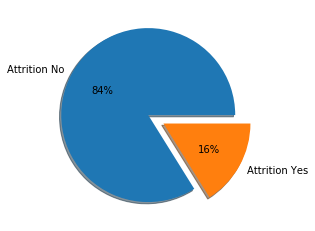

In [142]:
plt.pie(df['Attrition'].value_counts(), explode= (0,0.2),
autopct='%1.0f%%', shadow=True, labels= ['Attrition No', 'Attrition Yes'])

#### Let's check outliers through box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x145a46c8>,
 'caps': [<matplotlib.lines.Line2D at 0x145a7808>,
 'boxes': [<matplotlib.patches.PathPatch at 0x145a4108>],
 'medians': [<matplotlib.lines.Line2D at 0x145a7f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x145abf88>],
 'means': []}

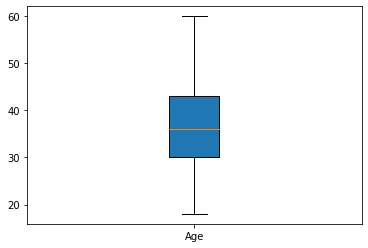

In [112]:
plt.boxplot(df.Age, patch_artist= True, labels = ['Age'])


{'whiskers': [<matplotlib.lines.Line2D at 0xf0a1048>,
 'caps': [<matplotlib.lines.Line2D at 0xf8aff48>,
 'boxes': [<matplotlib.patches.PathPatch at 0xf489e08>],
 'medians': [<matplotlib.lines.Line2D at 0xf8c80c8>],
 'fliers': [<matplotlib.lines.Line2D at 0xf8cf648>],
 'means': []}

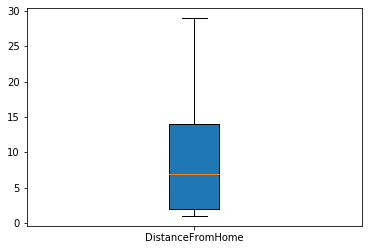

In [81]:
plt.boxplot(df.DistanceFromHome, patch_artist= True, labels = ['DistanceFromHome'])

{'whiskers': [<matplotlib.lines.Line2D at 0xcbdc5c8>,
 'caps': [<matplotlib.lines.Line2D at 0xf8e2c88>,
 'boxes': [<matplotlib.patches.PathPatch at 0xf8e0bc8>],
 'medians': [<matplotlib.lines.Line2D at 0xf6de308>],
 'fliers': [<matplotlib.lines.Line2D at 0xeb8f7c8>],
 'means': []}

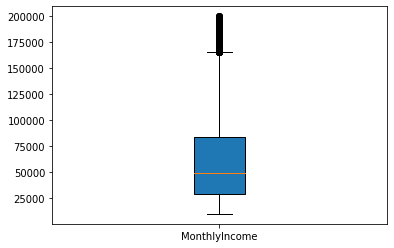

In [82]:
plt.boxplot(df.MonthlyIncome, patch_artist= True, labels = ['MonthlyIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0xef94d88>,
 'caps': [<matplotlib.lines.Line2D at 0xf6baac8>,
 'boxes': [<matplotlib.patches.PathPatch at 0xf533888>],
 'medians': [<matplotlib.lines.Line2D at 0xfeb6348>],
 'fliers': [<matplotlib.lines.Line2D at 0xccd1548>],
 'means': []}

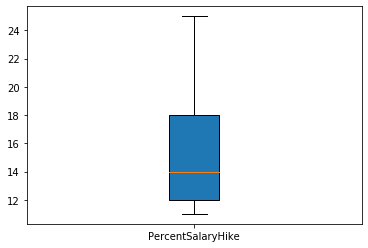

In [83]:
plt.boxplot(df.PercentSalaryHike, patch_artist= True, labels = ['PercentSalaryHike'])

{'whiskers': [<matplotlib.lines.Line2D at 0xcbd3b88>,
 'caps': [<matplotlib.lines.Line2D at 0xeb70fc8>,
 'boxes': [<matplotlib.patches.PathPatch at 0xcc86b88>],
 'medians': [<matplotlib.lines.Line2D at 0xff90788>],
 'fliers': [<matplotlib.lines.Line2D at 0xdf75d88>],
 'means': []}

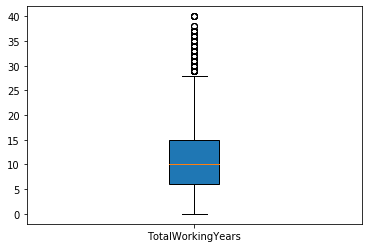

In [84]:
plt.boxplot(df.TotalWorkingYears, patch_artist= True, labels = ['TotalWorkingYears'])

{'whiskers': [<matplotlib.lines.Line2D at 0xff725c8>,
 'caps': [<matplotlib.lines.Line2D at 0x101f9308>,
 'boxes': [<matplotlib.patches.PathPatch at 0xfe0ff88>],
 'medians': [<matplotlib.lines.Line2D at 0x1022d308>],
 'fliers': [<matplotlib.lines.Line2D at 0x1022d988>],
 'means': []}

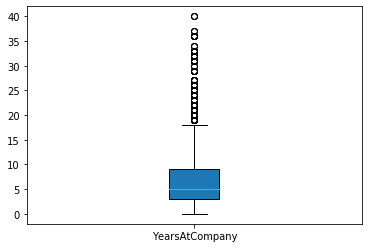

In [85]:
plt.boxplot(df.YearsAtCompany, patch_artist= True, labels = ['YearsAtCompany'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14035ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x140ac448>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1407bd48>],
 'medians': [<matplotlib.lines.Line2D at 0x14073b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1406d108>],
 'means': []}

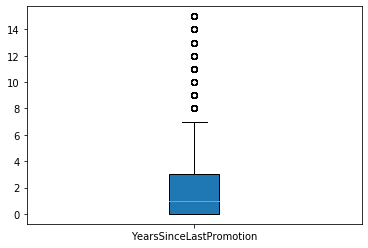

In [95]:
plt.boxplot(df.YearsSinceLastPromotion,patch_artist= True, labels = ['YearsSinceLastPromotion'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13fff208>,
 'caps': [<matplotlib.lines.Line2D at 0x13fc7408>,
 'boxes': [<matplotlib.patches.PathPatch at 0x13fff948>],
 'medians': [<matplotlib.lines.Line2D at 0x1402ce08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1402c788>],
 'means': []}

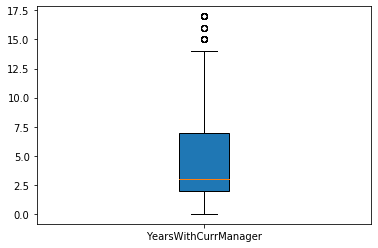

In [96]:
plt.boxplot(df.YearsWithCurrManager, patch_artist= True, labels = ['YearsWithCurrManager'])

### From above boxplots we can see that Age, DistanceFromHome, PercentSalaryHike don't have Outliers others have outliers
### IQR of Age is 30 to 43 years (13 years)

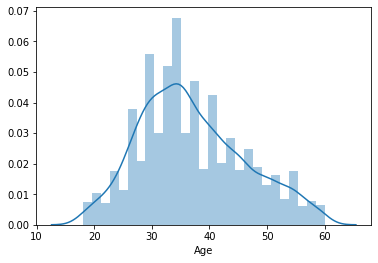

In [109]:
sns.distplot(df.Age)

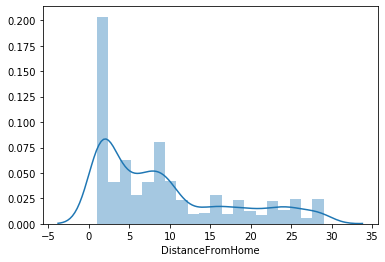

In [113]:
sns.distplot(df.DistanceFromHome)

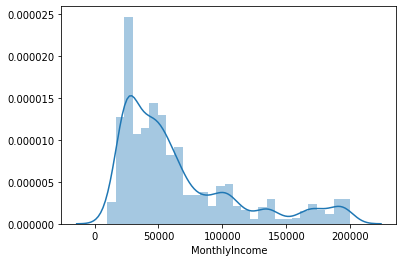

In [115]:
sns.distplot(df.MonthlyIncome)

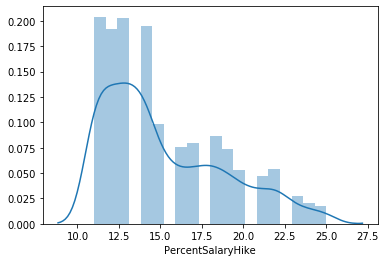

In [116]:
sns.distplot(df.PercentSalaryHike)

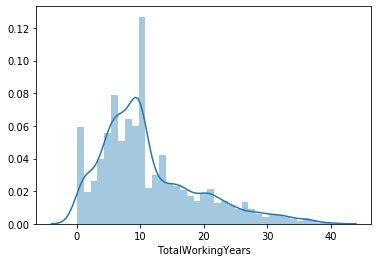

In [117]:
sns.distplot(df.TotalWorkingYears)

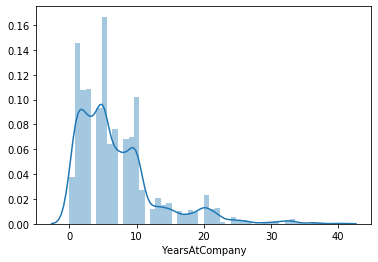

In [118]:
sns.distplot(df.YearsAtCompany)

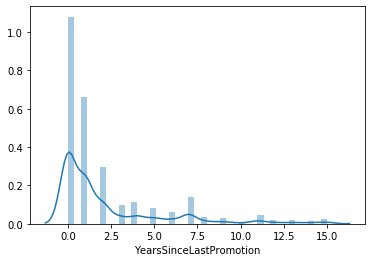

In [119]:
sns.distplot(df.YearsSinceLastPromotion)

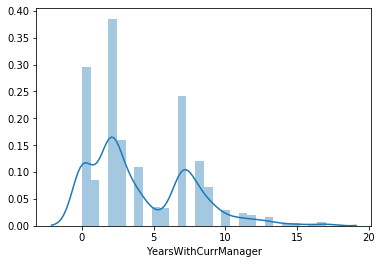

In [121]:
sns.distplot(df.YearsWithCurrManager)

### From above distplots we can see Distribution & Skewness of individual variables

## Let's see data distribution with Categorical Features
#### Categorical features which can have dependency on Attrition are: BusinessTravel, Department, Gender, JobLevel, JobRole, MaritalStatus

In [123]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

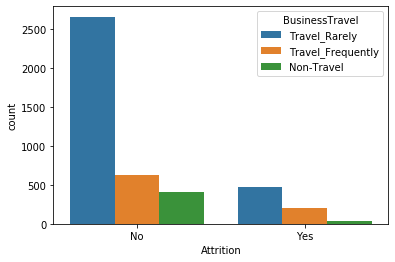

In [129]:
sns.countplot('Attrition', data= df, hue= 'BusinessTravel')

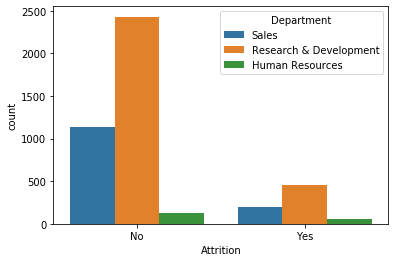

In [135]:
sns.countplot('Attrition', data= df, hue= 'Department')

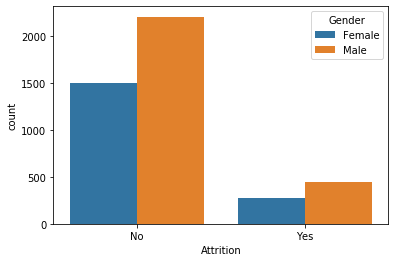

In [136]:
sns.countplot('Attrition', data= df, hue= 'Gender')

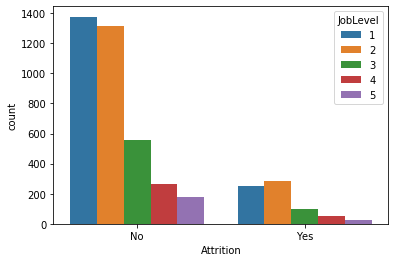

In [137]:
sns.countplot('Attrition', data= df, hue= 'JobLevel')

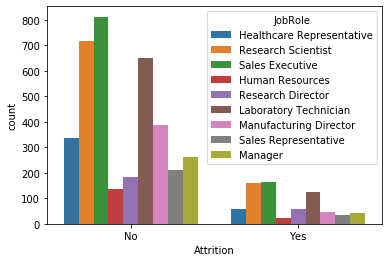

In [138]:
sns.countplot('Attrition', data= df, hue= 'JobRole')

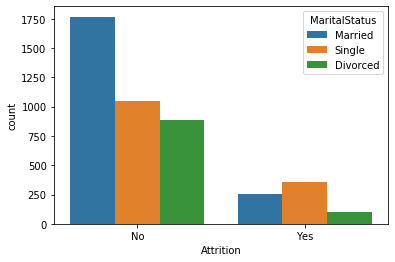

In [139]:
sns.countplot('Attrition', data= df, hue= 'MaritalStatus')

### From above plots we can make some conclusions:
#### 1. The employee who Rarely travels have high attrition rate
#### 2. Research & Development Department has high Attrition rate
#### 3. Male Employees have high Attrition rate as compared to Female Employees
#### 4. Job level 1 & 2 has high Attrition rate
#### 5. Research & Development, Sales Executives & Laboratory Technitions has high Attrition rate
#### 6. Single employees has high Attrition rate than married and Divorced Employees

In [143]:
#Convert all the Categorical data into numerical data
# get unique values from each categorical feature
print(df['BusinessTravel'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['Department'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales' 'Research & Development' 'Human Resources']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']


In [145]:
# sklearn used to convert data to numerical
from sklearn.preprocessing import LabelEncoder
cat_x = LabelEncoder()

df['BusinessTravel'] = cat_x.fit_transform(df['BusinessTravel'])
df['Department'] = cat_x.fit_transform(df['Department'])
df['EducationField'] = cat_x.fit_transform(df['EducationField'])
df['Gender'] = cat_x.fit_transform(df['Gender'])
df['JobRole'] = cat_x.fit_transform(df['JobRole'])
df['MaritalStatus'] = cat_x.fit_transform(df['MaritalStatus'])
df['Attrition'] = cat_x.fit_transform(df['Attrition'])

In [146]:
# checking categorical values again it's changed to numerical
# No = 0, Yes = 1
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


## Correlations of all independent features with dependent feature Attrition

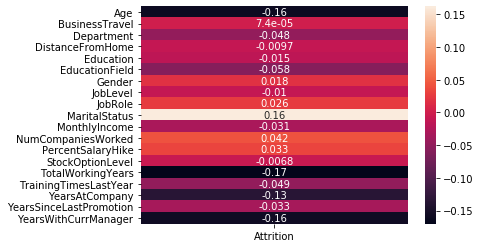

In [150]:
# Correlation of all columns with Attrition
sns.heatmap(df.corr().iloc[:, 1:2].drop('Attrition', axis= 0), annot = True)

In [151]:
# Function to check Accepting or Rejecting Null Hypothesis
def check(Attrition, b, c):
    print('\nNull Hypothesis: There is no Significant Correlation between Attrition and', b)
    print('Alternate Hypothesis: There is Significant Correlation between Attrition and', b)
    from scipy.stats import pearsonr
    stats, p = pearsonr(df.Attrition, c)
    print('\nCorrelation:', stats, 'P Value:', p,'\n')
    if p < 0.05:
        print('P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis')
        if stats > 0:
            print('There is Positive Correlation between Attrition and', b)
        else:
            print('There is Negative Correlation between Attrition and', b)
    else:
        print("P-Value >= 0.05 hence Null hypothesis is Accepted")
        print('There is no Significant Correlation between Attrition and', b)
    print('-----------------------------------------------------------------------------------------------------------------')

In [152]:
# Correlation & P - Value of relationship with Attrition and other features
check('Attrition', 'Age', df.Age)
check('Attrition', 'BusinessTravel', df.BusinessTravel)
check('Attrition', 'DistanceFromHome', df.DistanceFromHome)
check('Attrition', 'Education', df.Education)
check('Attrition', 'EducationField', df.EducationField)
check('Attrition', 'Gender', df.Gender)
check('Attrition', 'JobLevel', df.JobLevel)
check('Attrition', 'JobRole', df.JobRole)
check('Attrition', 'MaritalStatus', df.MaritalStatus)
check('Attrition', 'MonthlyIncome', df.MonthlyIncome)
check('Attrition', 'NumCompaniesWorked', df.NumCompaniesWorked)
check('Attrition', 'PercentSalaryHike', df.PercentSalaryHike)
check('Attrition', 'StockOptionLevel', df.StockOptionLevel)
check('Attrition', 'TotalWorkingYears', df.TotalWorkingYears)
check('Attrition', 'TrainingTimesLastYear', df.TrainingTimesLastYear)
check('Attrition', 'YearsAtCompany', df.YearsAtCompany)
check('Attrition', 'YearsSinceLastPromotion', df.YearsSinceLastPromotion)
check('Attrition', 'YearsWithCurrManager', df.YearsWithCurrManager)


Null Hypothesis: There is no Significant Correlation between Attrition and Age
Alternate Hypothesis: There is Significant Correlation between Attrition and Age

Correlation: -0.15920500686577965 P Value: 1.996801615886744e-26 

P-Value < 0.05 hence Null Hypothesis is rejected, Accepting Alternate Hypothesis
There is Negative Correlation between Attrition and Age
-----------------------------------------------------------------------------------------------------------------

Null Hypothesis: There is no Significant Correlation between Attrition and BusinessTravel
Alternate Hypothesis: There is Significant Correlation between Attrition and BusinessTravel

Correlation: 7.377694602225034e-05 P Value: 0.9960919945437704 

P-Value >= 0.05 hence Null hypothesis is Accepted
There is no Significant Correlation between Attrition and BusinessTravel
-----------------------------------------------------------------------------------------------------------------

Null Hypothesis: There is no Sign

### From above calculations we can have some conclusion based on correlation & P value
#### Features don't have relationship with Attrition : BusinessTravel, DistanceFromHome, Education, Gender, JobLevel, JobRole, StockOptionLevel
#### Features have relationship with Attrition and have Positive Correlation: MaritalStatus, NumCompaniesWorked, PercentSalaryHike, 
#### Features have relationship with Attrition and have Negative Correlation: Age, EducationField, MonthlyIncome, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager

# Statistical tests:
## As we seen in distplots none of features Normally Distributed so we can perform only Non-Parametric tests.
## Dependent variable is Attrition and that is Categorical so in Non-Parametric we can perform below Tests:
### 1. Mann-Whitney Test - 1 Dependent categorical variable and other continuous varibles
### 2. CHI Square test - Only for Categorical Variables



## 1. Mann-Whitney Test:

#### For Mann-Whitney Test we need to separate data as Attrition Yes & Attrition No

In [157]:
# attrition = Yes and no seprate
att_yes = df[df['Attrition']== 1]
att_no = df[df['Attrition']== 0]

In [158]:
att_yes.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
6,28,1,2,1,11,2,3,1,2,7,2,58130,2.0,20,1,5.0,2,0,0,0
13,47,1,0,1,1,1,3,1,1,6,1,57620,1.0,11,2,10.0,4,10,9,9
28,44,1,1,1,1,2,3,1,2,6,0,103330,3.0,14,1,19.0,2,1,0,0
30,26,1,2,1,4,3,3,1,3,6,0,68540,2.0,11,0,5.0,5,3,0,2


In [159]:
att_no.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4
5,46,0,2,1,8,3,1,0,4,5,1,40710,3.0,13,0,28.0,5,7,7,7


##### Continuous Variables we should check with Attrition as per above correlation results : Age, MonthlyIncome, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager,  NumCompaniesWorked, PercentSalaryHike

In [160]:
# defining function for ManWhitney tests
def manwhitney(stats, p, b):
    print('\nH0 = There is no significant difference between Attrition_yes with',b, 'and Attrition_No with', b)
    print('H1 = There is significant difference between Attrition_yes with',b, 'and Attrition_No with', b, '\n')
    print(stats, 'P Value:', p,'\n')
    if p < 0.05:
        print('P-Value < 0.05 hence H0 rejected, Accepting H1 Hypothesis')
    else:
        print("P-Value >= 0.05 hence H0 Accepted")
    print('-----------------------------------------------------------------------------------------------------------------')

In [161]:
# importing scipy module
from scipy.stats import mannwhitneyu

In [166]:
stats, p = mannwhitneyu(att_yes.Age, att_no.Age)
manwhitney(stats, p, 'Age')
stats, p = mannwhitneyu(att_yes.MonthlyIncome, att_no.MonthlyIncome)
manwhitney(stats, p, 'MonthlyIncome')
stats, p = mannwhitneyu(att_yes.NumCompaniesWorked, att_no.NumCompaniesWorked)
manwhitney(stats, p, 'NumCompaniesWorked')
stats, p = mannwhitneyu(att_yes.PercentSalaryHike, att_no.PercentSalaryHike)
manwhitney(stats, p, 'PercentSalaryHike')
stats, p = mannwhitneyu(att_yes.TotalWorkingYears, att_no.TotalWorkingYears)
manwhitney(stats, p, 'TotalWorkingYears')
stats, p = mannwhitneyu(att_yes.TrainingTimesLastYear, att_no.TrainingTimesLastYear)
manwhitney(stats, p, 'TrainingTimesLastYear')
stats, p = mannwhitneyu(att_yes.YearsAtCompany, att_no.YearsAtCompany)
manwhitney(stats, p, 'YearsAtCompany')
stats, p = mannwhitneyu(att_yes.YearsSinceLastPromotion, att_no.YearsSinceLastPromotion)
manwhitney(stats, p, 'YearsSinceLastPromotion')
stats, p = mannwhitneyu(att_yes.YearsWithCurrManager, att_no.YearsWithCurrManager)
manwhitney(stats, p, 'YearsWithCurrManager')



H0 = There is no significant difference between Attrition_yes with Age and Attrition_No with Age
H1 = There is significant difference between Attrition_yes with Age and Attrition_No with Age 

961731.0 P Value: 2.9951588479067175e-30 

P-Value < 0.05 hence H0 rejected, Accepting H1 Hypothesis
-----------------------------------------------------------------------------------------------------------------

H0 = There is no significant difference between Attrition_yes with MonthlyIncome and Attrition_No with MonthlyIncome
H1 = There is significant difference between Attrition_yes with MonthlyIncome and Attrition_No with MonthlyIncome 

1264900.5 P Value: 0.053577283839938566 

P-Value >= 0.05 hence H0 Accepted
-----------------------------------------------------------------------------------------------------------------

H0 = There is no significant difference between Attrition_yes with NumCompaniesWorked and Attrition_No with NumCompaniesWorked
H1 = There is significant difference be

### From above Mann-Whitney Tests we can have conclusion
#### There is no significant difference between Attrition Yes Monthly Income & Attrition No Monthly Income
#### There is significant difference between Attrition Yes & Attrition No with following Variables: Age, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager, NumCompaniesWorked, PercentSalaryHike

## 2. CHI Square Test:
#### For CHI Square test we are checking dependency of Categorical Variables with Attrition

#### Categorical Variables we should check based on correlation results: BusinessTravel , EducationField , Gender ,  Department , JobRole , MaritalStatus , JobLevel , StockOptionLevel

In [167]:
# defining function for CHI Square tests
def chi2(stats, p, b):
    print('\nHo= There is no dependency betweem Attrition and', b)
    print('H1= There is dependency betweem Attrition and', b, '\n')
    print(chitable,'\n')
    print(stats, 'P Value:', p,'\n')
    if p < 0.05:
        print('P-Value < 0.05 hence H0 rejected, Accepting H1 Hypothesis')
    else:
        print("P-Value >= 0.05 hence H0 Accepted")
    print('-----------------------------------------------------------------------------------------------------------------')

In [168]:
# impoerting scipy module
from scipy.stats import chi2_contingency

In [178]:
chitable = pd.crosstab(df.Attrition, df.BusinessTravel)
stats, p, dof, expected = chi2_contingency(chitable)
chi2(stats, p, 'BusinessTravel')
chitable = pd.crosstab(df.Attrition, df.EducationField)
stats, p, dof, expected = chi2_contingency(chitable)
chi2(stats, p, 'EducationField')
chitable = pd.crosstab(df.Attrition, df.Gender)
stats, p, dof, expected = chi2_contingency(chitable)
chi2(stats, p, 'Gender')
chitable = pd.crosstab(df.Attrition, df.Department)
stats, p, dof, expected = chi2_contingency(chitable)
chi2(stats, p, 'Department')
chitable = pd.crosstab(df.Attrition, df.JobRole)
stats, p, dof, expected = chi2_contingency(chitable)
chi2(stats, p, 'JobRole')
chitable = pd.crosstab(df.Attrition, df.MaritalStatus)
stats, p, dof, expected = chi2_contingency(chitable)
chi2(stats, p, 'MaritalStatus')
chitable = pd.crosstab(df.Attrition, df.JobLevel)
stats, p, dof, expected = chi2_contingency(chitable)
chi2(stats, p, 'JobLevel')
chitable = pd.crosstab(df.Attrition, df.StockOptionLevel)
stats, p, dof, expected = chi2_contingency(chitable)
chi2(stats, p, 'StockOptionLevel')


Ho= There is no dependency betweem Attrition and BusinessTravel
H1= There is dependency betweem Attrition and BusinessTravel 

BusinessTravel    0    1     2
Attrition                     
0               414  624  2661
1                36  207   468 

72.54724105696552 P Value: 1.764276972983189e-16 

P-Value < 0.05 hence H0 rejected, Accepting H1 Hypothesis
-----------------------------------------------------------------------------------------------------------------

Ho= There is no dependency betweem Attrition and EducationField
H1= There is dependency betweem Attrition and EducationField 

EducationField   0     1    2     3    4    5
Attrition                                    
0               48  1515  402  1167  216  351
1               33   303   75   225   30   45 

46.194921001730584 P Value: 8.288917469574179e-09 

P-Value < 0.05 hence H0 rejected, Accepting H1 Hypothesis
---------------------------------------------------------------------------------------------------

### From above performed CHI Square tests we can have following conclusions
#### Variables have dependency with Attrition are: BusinessTravel , EducationField, Department , JobRole , MaritalStatus
#### Variables don't have dependency with Attrition are: Gender, JobLevel , StockOptionLevel